In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [4]:
class Batsmanstate(TypedDict):

    runs : int
    balls : int
    fours: int
    sixes : int

    sr : float
    ball_per_boundary : float
    boundary_percentage: float
    summary:str

In [5]:
graph=StateGraph(Batsmanstate)

In [6]:
def strike_rate(state:Batsmanstate)->Batsmanstate:
    sr=round((state['runs']/state['balls'])*100,2)
    return {'sr':sr}

def calculate_bpb(state:Batsmanstate)->Batsmanstate:
    bpb= round((state['fours']+state['sixes'])/state['balls'],2)
    return {'ball_per_boundary': bpb}

def boundary_per_run(state:Batsmanstate)->Batsmanstate:
    bpr=round(((state['fours']*4)+(state['sixes']*6))/state['runs'],2)
    return {'boundary_percentage':bpr}
def summary(state:Batsmanstate)->Batsmanstate:
    summary=f"strike rate is {state['sr']}\n ball per boundary is {state['ball_per_boundary']} & \n boundary per run is {state['boundary_percentage']}"
    return {'summary':summary}

In [7]:
graph.add_node("strike_rate",strike_rate)
graph.add_node("bpb",calculate_bpb)
graph.add_node("boundary_per",boundary_per_run)
graph.add_node("summary",summary)

graph.add_edge(START,"strike_rate")
graph.add_edge(START,"bpb")
graph.add_edge(START,"boundary_per")

graph.add_edge('strike_rate',"summary")
graph.add_edge('bpb',"summary")
graph.add_edge('boundary_per',"summary")
graph.add_edge('summary',END)

pl_workflow=graph.compile()

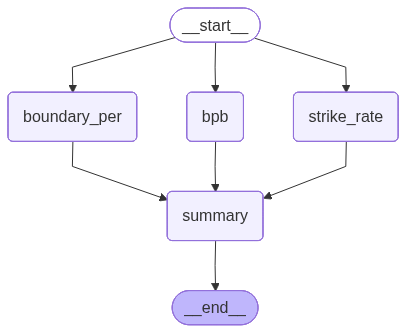

In [8]:
pl_workflow

In [10]:
initial_dict={
    'runs' : 100,
    'balls' : 50,
    'fours': 6,
    'sixes' : 5
}

output=pl_workflow.invoke(initial_dict)
print(output)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 5, 'sr': 200.0, 'ball_per_boundary': 0.22, 'boundary_percentage': 0.54, 'summary': 'strike rate is 200.0\n ball per boundary is 0.22 & \n boundary per run is 0.54'}
